### Convex optimization

+ It is not easy to find practical problems that are just smooth (with Lipschitz continuous gradients only), in order to show sublinear convergence in practice (even logistic regression, as we will see later on, has linear convergence under assumptions).

+ In the following example, we will highlight the importance of the condition number in optimization

### Well-conditioned linear regression

In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la
from scipy.sparse.linalg import svds, eigs
import math

p = 100  # Ambient dimension
n = 100  # Number of samples

# Generate a p-dimensional zero vector
x_star = np.random.randn(p)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Well-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 2, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
u, s, v = svds(A, k=1)
eta = 1/s**2
print(eta)

1.9999999999999984
[0.25]


In [3]:
def GD(y, A, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_new = x_old - eta * grad        
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list

def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

iter# = 0, ||x_new - x_old||_2 = 0.6172405880547521
iter# = 1, ||x_new - x_old||_2 = 0.20842332354514154
iter# = 2, ||x_new - x_old||_2 = 0.10569364521170295
iter# = 3, ||x_new - x_old||_2 = 0.061984304042504684
iter# = 4, ||x_new - x_old||_2 = 0.03920379432663846
iter# = 5, ||x_new - x_old||_2 = 0.025890485012264552
iter# = 6, ||x_new - x_old||_2 = 0.017557620875225093
iter# = 7, ||x_new - x_old||_2 = 0.01211554052837157
iter# = 8, ||x_new - x_old||_2 = 0.00846212889024506
iter# = 9, ||x_new - x_old||_2 = 0.005963041207112072
iter# = 10, ||x_new - x_old||_2 = 0.004230497988464758
iter# = 11, ||x_new - x_old||_2 = 0.0030173467423120887
iter# = 12, ||x_new - x_old||_2 = 0.002161344007812331
iter# = 13, ||x_new - x_old||_2 = 0.0015536733984886641
iter# = 14, ||x_new - x_old||_2 = 0.0011201710365420488
iter# = 15, ||x_new - x_old||_2 = 0.0008096643795124027
iter# = 16, ||x_new - x_old||_2 = 0.0005865019200779634
iter# = 17, ||x_new - x_old||_2 = 0.00042565251529181155
iter# = 18, ||x_new 

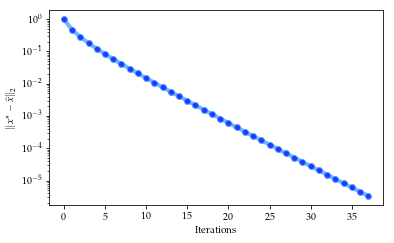

In [4]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 100

x_IHT, x_list, f_list = GD(y, A, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

In [5]:
# Ill-conditioned matrix A
A = np.random.randn(n, p)
[U, S, V] = la.svd(A)
S = np.linspace(1, 100, n)
S = np.diag(S)
A = U.dot(S.dot(V.T))

y = A.dot(x_star)

# Print condition number of A
print(la.cond(A))

# Compute largest singular value of A
u, s, v = svds(A, k=1)
eta = 1/s**2
print(eta)

100.00000000000003
[0.0001]


iter# = 0, ||x_new - x_old||_2 = 0.5749752093356013
iter# = 1, ||x_new - x_old||_2 = 0.14788815379061435
iter# = 2, ||x_new - x_old||_2 = 0.08845576216295618
iter# = 3, ||x_new - x_old||_2 = 0.06180968263063536
iter# = 4, ||x_new - x_old||_2 = 0.04651081804255108
iter# = 5, ||x_new - x_old||_2 = 0.036901527397852345
iter# = 6, ||x_new - x_old||_2 = 0.03044762826432337
iter# = 7, ||x_new - x_old||_2 = 0.0258463851322907
iter# = 8, ||x_new - x_old||_2 = 0.022391454498339416
iter# = 9, ||x_new - x_old||_2 = 0.019685245772561574
iter# = 10, ||x_new - x_old||_2 = 0.0174950170513354
iter# = 11, ||x_new - x_old||_2 = 0.01567834285020928
iter# = 12, ||x_new - x_old||_2 = 0.014143774907594232
iter# = 13, ||x_new - x_old||_2 = 0.012829679051911347
iter# = 14, ||x_new - x_old||_2 = 0.011692576737185198
iter# = 15, ||x_new - x_old||_2 = 0.010700532908231452
iter# = 16, ||x_new - x_old||_2 = 0.009829277269864675
iter# = 17, ||x_new - x_old||_2 = 0.009059843338710679
iter# = 18, ||x_new - x_old||_2 

iter# = 642, ||x_new - x_old||_2 = 5.752924191418266e-05
iter# = 643, ||x_new - x_old||_2 = 5.736698839569322e-05
iter# = 644, ||x_new - x_old||_2 = 5.720538855860331e-05
iter# = 645, ||x_new - x_old||_2 = 5.704443885723861e-05
iter# = 646, ||x_new - x_old||_2 = 5.6884135770308603e-05
iter# = 647, ||x_new - x_old||_2 = 5.672447580073846e-05
iter# = 648, ||x_new - x_old||_2 = 5.656545547555989e-05
iter# = 649, ||x_new - x_old||_2 = 5.64070713455976e-05
iter# = 650, ||x_new - x_old||_2 = 5.624931998539375e-05
iter# = 651, ||x_new - x_old||_2 = 5.6092197992886244e-05
iter# = 652, ||x_new - x_old||_2 = 5.593570198936728e-05
iter# = 653, ||x_new - x_old||_2 = 5.577982861918459e-05
iter# = 654, ||x_new - x_old||_2 = 5.562457454961922e-05
iter# = 655, ||x_new - x_old||_2 = 5.546993647062863e-05
iter# = 656, ||x_new - x_old||_2 = 5.531591109480959e-05
iter# = 657, ||x_new - x_old||_2 = 5.516249515703977e-05
iter# = 658, ||x_new - x_old||_2 = 5.500968541442933e-05
iter# = 659, ||x_new - x_old||

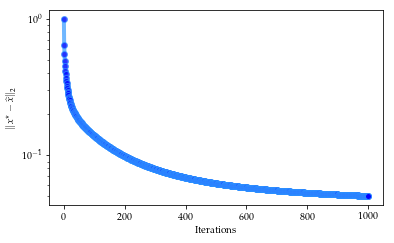

In [6]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

x_IHT, x_list, f_list = GD(y, A, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

**Problem definition: Sparse linear regression**. 

\begin{align}
  y = A x^\star + w
\end{align}

+ $A \in \mathbb{R}^{n \times p}$, but now $n \ll p$
+ $x^\star \in \mathbb{R}^p$ but $k$-sparse, where $k \ll p$
+ $w \in \mathbb{R}^n$

Assume $n = p$, and $A$ is in general position.
Given $y$ and $A$:

\begin{equation*}
\begin{aligned}
& \underset{x \in \mathbb{R}^p}{\text{min}}
& & f(x) \triangleq \|y - A x\|_2^2 \\
& \text{subject to} 
& & \|x\|_1 \leq \lambda
\end{aligned}
\end{equation*}

+ This is the famous Lasso approach, that was analyzed and popularized by R. Tibshirani in 1996.

Tibshirani, Robert. "Regression shrinkage and selection via the lasso." Journal of the Royal Statistical Society. Series B (Methodological) (1996): 267-288. ---> 25K citations!

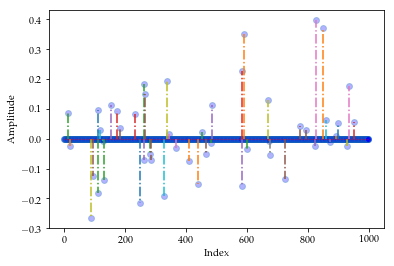

In [7]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.optimize import fmin

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

from PIL import Image

import random
from numpy import linalg as la

p = 1000  # Ambient dimension
n = 400   # Number of samples
k = 50    # Sparsity level

# Generate a p-dimensional zero vector
x_star = np.zeros(p)
# Randomly sample k indices in the range [1:p]
x_star_ind = random.sample(range(p),  k) 
# Set x_star_ind with k random elements from Gaussian distribution
x_star[x_star_ind] = np.random.randn(k)
# Normalize
x_star = (1 / la.norm(x_star, 2)) * x_star

# Plot
xs = range(p)
markerline, stemlines, baseline = plt.stem(xs, x_star, '-.')
plt.setp(markerline, 'alpha', 0.3, 'ms', 6)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'color', 'r', 'linewidth', 1, 'alpha', 0.3)
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.show()

### Hyper-parameter tuning

+ Key component in Lasso is the proper guess/tuning of the hyper-parameter $\lambda$.
+ Let's see how it works in practice

In [8]:
import math

# Generate sensing matrix
A = (1 / math.sqrt(n)) * np.random.randn(n, p)

# Observation model
y = A @ x_star

# Compute largest singular value of A
u, s, v = svds(A, k=1)
eta = 1/s**2
print(eta)

[0.15305615]


### Projection onto the $\ell_1$ norm ball

+ We first need to figure out how the projection onto the $\ell_1$-norm ball can be efficiently completed. Is it possible? Or should we depend on approximation schemes?

+ It turns out that the projection onto the $\ell_1$ norm ball is efficiently and accurately computed as:

1. Sort input vector $x$ into $\mu$: $\mu_1 \geq \mu_2 \geq \cdots \geq \mu_p$.

2. Find $\rho = \max \left\{ j \in [p]~:~ \mu_j - \tfrac{1}{j} \left( \sum_{r = 1}^j \mu_r - \lambda \right) > 0 \right\}$

3. Define $\theta = \tfrac{1}{\rho} \left( \sum_{i=1}^\rho \mu_i - \lambda\right)$

4. Output $w$ such that $w_i = \max\{ x_i - \theta, 0 \}$



In [9]:
from numpy import linalg as la

# Projection onto l1 norm ball
def l1normProj(x, l):
    assert l > 0, "Radius lambda must be strictly positive (%d <= 0)" % l
    n, = x.shape  
    
    u = np.abs(x)                               # compute the vector of absolute values
    
    if u.sum() <= l:                            # check if v is already a solution    
        return x
    
    u = np.sort(x)[::-1]                        # get the array of cumulative sums of a sorted (decreasing) copy of v
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - l))[0][-1]   # get the number of > 0 components of the optimal solution
    theta = (float(cssv[rho] - l) / rho).clip(min=0)                 # compute the projection by thresholding v using theta          # compute the Lagrange multiplier associated to the simplex constraint
    w = (np.abs(x) - theta).clip(min=0)                 # compute the projection by thresholding v using theta
    w *= np.sign(x)    
        
    return w

# Returns the value of the objecive function
def f(y, A, x):
    return 0.5 * math.pow(la.norm(y - A @ x, 2), 2)

In [10]:
def Lasso(y, A, l, eta, iters, epsilon, verbose, x_star):
    p = A.shape[1]   # Length of original signal    
    n = A.shape[0]   # Length of measurement vector
    
    x_new = np.zeros(p)    # Initial estimate    
    At = np.transpose(A)   # Transpose of A

    x_list, f_list = [1], [f(y, A, x_new)]

    for i in range(iters):
        x_old = x_new
    
        # Compute gradient
        grad = -At @ (y - A @ x_new)
    
        # Perform gradient step
        x_temp = x_old - eta * grad    
    
        # Perform hard thresholding step
        x_new = l1normProj(x_temp, l)
    
        if (la.norm(x_new - x_old, 2) / la.norm(x_new, 2)) < epsilon:
            break
                
        # Keep track of solutions and objective values
        x_list.append(la.norm(x_new - x_star, 2))
        f_list.append(f(y, A, x_new))
        
        if verbose:
            print("iter# = "+ str(i) + ", ||x_new - x_old||_2 = " + str(la.norm(x_new - x_old, 2)))
    
    print("Number of steps:", len(f_list))
    return x_new, x_list, f_list
    

iter# = 0, ||x_new - x_old||_2 = 0.24210381671403117
iter# = 1, ||x_new - x_old||_2 = 0.08653018847736305
iter# = 2, ||x_new - x_old||_2 = 0.06532478797486914
iter# = 3, ||x_new - x_old||_2 = 0.05426040783174789
iter# = 4, ||x_new - x_old||_2 = 0.046579872635513504
iter# = 5, ||x_new - x_old||_2 = 0.041018244490991174
iter# = 6, ||x_new - x_old||_2 = 0.03661120112899112
iter# = 7, ||x_new - x_old||_2 = 0.032788311085040794
iter# = 8, ||x_new - x_old||_2 = 0.029766981445725038
iter# = 9, ||x_new - x_old||_2 = 0.027507271277199707
iter# = 10, ||x_new - x_old||_2 = 0.025497077999605343
iter# = 11, ||x_new - x_old||_2 = 0.023857925705194998
iter# = 12, ||x_new - x_old||_2 = 0.02244568846169686
iter# = 13, ||x_new - x_old||_2 = 0.021107093613711454
iter# = 14, ||x_new - x_old||_2 = 0.019867923103133338
iter# = 15, ||x_new - x_old||_2 = 0.018713836746658913
iter# = 16, ||x_new - x_old||_2 = 0.017780665770123657
iter# = 17, ||x_new - x_old||_2 = 0.016907819754433978
iter# = 18, ||x_new - x_ol

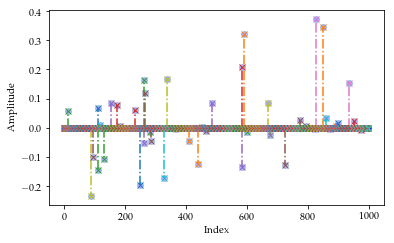

2.5


In [11]:
# Run algorithm
epsilon = 1e-6                # Precision parameter
iters = 1000

#l = la.norm(x_star, 1)
l = 2.5

x_Lasso, x_list, f_list = Lasso(y, A, l, eta, iters, epsilon, True, x_star)

# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(p)
markerline, stemlines, baseline = plt.stem(xs, x_Lasso, '-.x')
plt.setp(markerline, 'alpha', 0.3, 'ms', 6)
plt.setp(markerline, 'markerfacecolor', 'b')
plt.setp(baseline, 'linewidth', 1, 'alpha', 0.3)
plt.xlabel('Index')
plt.ylabel('Amplitude')
#plt.title(r"$\|x^\star - \widehat{x}\|_2 = %s$" %(la.norm(x_star - x_IHT, 2)), fontsize=16)

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()
print(l)

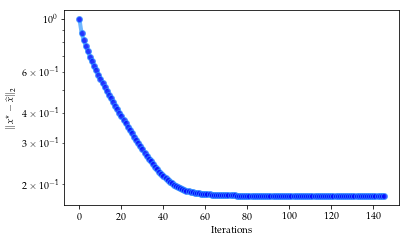

In [13]:
# Plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

xs = range(len(x_list))
plt.plot(xs, x_list, '-o', color = '#3399FF', linewidth = 4, alpha = 0.7, markerfacecolor = 'b')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel(r"$\|x^\star - \widehat{x}\|_2$")

# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)
plt.show()

### Logistic regression (based on Aurélien Geron's post)

Let us first re-define the problem of logistic regression. Similar to linear regression, we are interested in finding a vector $\theta$ in $p$ dimensions that linearly interacts with the input features $x_i$:

$$
\theta^\top x_i
$$

However, in contrast to linear regression where we compare the output $\theta^\top x_i$ with the known response $y_i$ via the $\ell_2$-norm cost function:

$$
\left(y_i - \theta^\top x_i\right)^2,
$$

in logistic regression, we first pass the inner product via the sigmoid function $\sigma(\cdot)$:

$$
\sigma(\theta^\top x_i).
$$

Before, we proceed let's recall how a sigmoid function looks like:

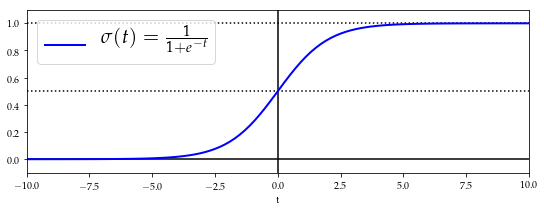

In [15]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
# save_fig("logistic_function_plot")
plt.show()

I.e., the sigmoid function is a function that takes values in the real line and squeezes them between the values $[0, 1]$. Thus, it works as a mapping onto probabilities: if the input argument is positive then, we get values towards 1; if the input argument is negative, we get values towards 0. 

Thus, the logistic/sigmoid function works perfectly (at least in intuition) for binary classification: if in a way we can find a way to map input $x_i$ into a single number, which in sequence will be "classified" by the sigmoid function, then we can build a classifier.

This is the notion of logistic regression:

$$
\hat{y}_i := h_{\theta}(x_i) = \sigma(\theta^\top x_i)
$$

where:

$$
\begin{cases}
\text{class } 0, & \text{ if } \hat{y}_i < 0.5, \\
\text{class } 1, & \text{ if } \hat{y}_i \geq 0.5,
\end{cases}
$$


But, how we train such a model? We want to penalize cases where, when the true $y = 0$, the estimated $\hat{y}$ should not be close to 1; and vice versa, when the true $y = 1$, we want the estimated $\hat{y}$ not be close to 0. This is well-represented via the following cost function:

$$
c(\theta) = \begin{cases}
-\log(\hat{y}),     &\text{ if } y = 1, \\
-\log(1 - \hat{y}), &\text{ if } y = 0.
\end{cases}
$$

Taking the maximum likelihood estimation approach (out of the scope of this course, but should be described in an ML course), we obtain the cost function, over $n$ samples:

$$
\mathcal{L}(\theta) = -\tfrac{1}{n} \sum_{i = 1}^n \left(y_i \cdot \log(\hat{y}_i) + (1 - y_i) \log (1 - \hat{y}_i) \right),
$$

where $\theta$, our parameters to optimize on, are hidden in $\hat{y}_i$. 

It turns out that the logistic regression objective is convex, so one can rely on convex optimization ideas in order to solve the problem. See the Notes of the course for a description of the above procedure (with probably different notation on purpose), and how we compute gradients and Hessians. Then, one can use Gradient descent to solve the problem.

#### Example with real dataset

In [18]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

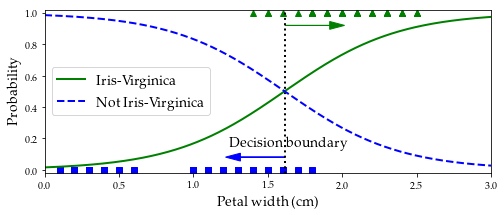

In [20]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)

# {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}

log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
# save_fig("logistic_regression_plot")
plt.show()

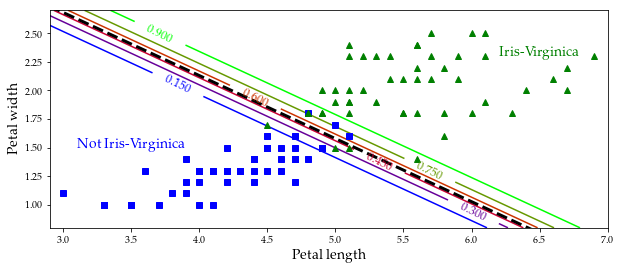

In [22]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

(It is a cool exercise to design your own GD solver for multiclass / softmax regression)